### The Start
This project started from a thought which came to my mind when i first completely watched a standup comedy show on Netflix last week by Ali Wong and i absolutely loved it.
I wanted to get some insights about the factors which make Ali Wong's routines different from other standup comedians.
Secondly, I was also curious about the reason why i found this show very interesting given my past history of avoiding standup comedy shows.
The best tool which i had was natural language processing (NLP) which helped me satisfy my thought.
Let us have a look at how i performed a complete Exploratory Data Analysis(EDA).


### Data Gathering

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text # Get all data from URL
    soup = BeautifulSoup(page, "lxml") # Read as an HTML document
    text = [p.text for p in soup.find(class_="post-content").find_all('p')] # Pull out all text from post-content
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [ ]:
# Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [ ]:
# Pickle (save) files for later use
# We pickle because we want to avoid performing API calls on site multiple times

# Make a new directory to hold the text files
!mkdir transcripts # anything after ! will be executed by the system command-line (not by the Python kernel) 

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [ ]:
# Just looking at data again
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [ ]:
data['louis'][3]

'“The Food Chain”\nMust be awful to be other kinds of stuff, You know? I’m glad I’m this. This is a pretty good deal when you consider the alternatives. Anything else, any other kind of thing, you’re in the food chain. You’re in the food– we are out of the food chain. I don’t know if we fully appreciate the fact That we got out of the food chain. That is a massive upgrade Because for every other living thing, Life ends by being eaten. That’s how all life ends, is– Every single life except human life, Every life ends like this. Aah! Aah! Aah! We’re the only ones that get to just die old in a bed, Just “I love you. Bye.” I mean, imagine if we were still in the food chain On top of everything else. Imagine if we were in the food chain. It would just be another thing you gotta deal with. You’re already having a bad day. You wake in up in the morning. You’re making breakfast. You burn your toast, and it’s too late to try again, And your kid comes in and says, “beh,” and you’re like, “fine,”

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'louis'

In [ ]:
# Notice that our dictionary is currently in the format of key: comedian, value: list of text
next(iter(data.values()))

### Data Preprocessing

In [ ]:
# In the dict above, the values are actually a list of text
# We are going to change this one giant string of text. New format will be {key: comedian, value: string}
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a Pandas DataFrame
# I will put it into a Pandas DataFrame
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()

# Print the Corpus
data_df 

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [ ]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

**Creating a Corpus**

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower() # converting to lowercase
    text = re.sub('\[.*?\]', '', text) # removing text which is in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Remove square brackets
round1 = lambda x: clean_text_round1(x) 

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional quotation marks and newline text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [ ]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [ ]:
# Let us now pickle it for later use in our project
data_df.to_pickle("corpus.pkl")

**Creating a document-term matrix**

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript) # fit count vectorizor to our CLEAN transcript data

# Convert it to an array and label all the columns
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index

# Document-Term matrix
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accents,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishments,according,accordingly,accoutrements,accurate,...,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youi,youll,young,younger,youngest,youre,youth,youthis,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,...,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,1,4,2,0,0,31,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,0,5,0,0,0,59,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,...,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,0,2,5,0,0,19,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,0,3,10,0,0,15,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,0,3,0,1,0,51,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,48,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,42,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,1,0,0,0,1,0,...,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,0,1,2,1,0,28,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,1,...,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,0,1,8,3,0,50,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

### Exploratory Data Analysis


In [ ]:
import pandas as pd
data=pd.read_pickle('dtm.pkl')
# let us take a look at our document term matrix
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accents,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishments,according,accordingly,accoutrements,accurate,...,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youi,youll,young,younger,youngest,youre,youth,youthis,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,...,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,1,4,2,0,0,31,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,0,5,0,0,0,59,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,...,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,0,2,5,0,0,19,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,0,3,10,0,0,15,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,0,3,0,1,0,51,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,48,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,42,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,1,0,0,0,1,0,...,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,0,1,2,1,0,28,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,1,...,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,0,1,8,3,0,50,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [ ]:
# Here, we can see that the comedians are represented in rows and the individual words in columns
# Let us transpose our data as it is difficult to work on rows as compared to columns
data=data.transpose()
data

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Now, let us find the top 30 words of each comedian
top_dict={}
for c in data.columns:
  top_word=data[c].sort_values(ascending=False).head(30)
  top_dict[c]=list(zip(top_word.index,top_word.values))
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('tell', 13),
  ('yeah', 13),
  ('theyre', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('ive', 15),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15)],

In [ ]:
# Printing top 15 words for each comedian
for comedian,top_words in top_dict.items():
  print(comedian)
  print(', '.join([word for word,count in top_words[0:15]]))
  print('-----')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, gotta, husband
-----
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people, tell
-----
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, want
-----
bo
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos, fucking
-----
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking, black
-----
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan, say
-----
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going, think
-----
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit, got
-----
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got, say
-----
louis
like, just, know, dont, thats, youre, im, life, people, thing, go

In [ ]:
'''
At this point, we can clearly see that the most often used words have little meaning and can be classified as stop words. 
So, we move on and add these words to the list of stopwords
'''
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Creating a combined list of all comedians' list of top 30 words used

words=[]
for comedian in data.columns:
  top=[word for word,count in top_dict[comedian]]
  for t in top:
    words.append(t)

words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'tell',
 'yeah',
 'theyre',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'did',
 'good',
 'school',
 'jokes',
 'yeah',
 'ive',
 'okay',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'eye',
 'said',
 'p

In [ ]:
# Aggregate this list and identify the most common words along with how many comedian's routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

The Criteria which we will be using to add these words to the list of stop words is:

If more than half of the comedians( i.e. 6) have that word in their top 30 list, then add the word to the list of stopwords.

In [ ]:
add_stop_words=[word for word,count in Counter(words).most_common() if count>6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'yeah',
 'said']

In [ ]:
# Let us now update our document-term matrix with the new list of words
from sklearn.feature_extraction import text # Contains the stop words list
from sklearn.feature_extraction.text import CountVectorizer
# Read in cleaned data from corpus 
data_clean=pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)

# RECREATE DOCUMENT-TERM MATRIX WHICH EXCLUDES OUR ADDITIONAL STOP WORDS
cv=CountVectorizer(stop_words=stop_words)
data_cv=cv.fit_transform(data_clean.transcript)
data_stop=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())
data_stop.index=data_clean.index

# Now our data has been modified and cleaned after removing the updated stopwords

# pickle the results for later use
import pickle
pickle.dump(cv,open("cv_stop.pkl",'wb'))
data_stop.to_pickle("dtm_stop.pkl")


In [ ]:
# Let's make some word clouds out of the data we just processed
from wordcloud import WordCloud
wc=WordCloud(stopwords=stop_words,background_color='white',colormap="Dark2",max_font_size=150,random_state=42)


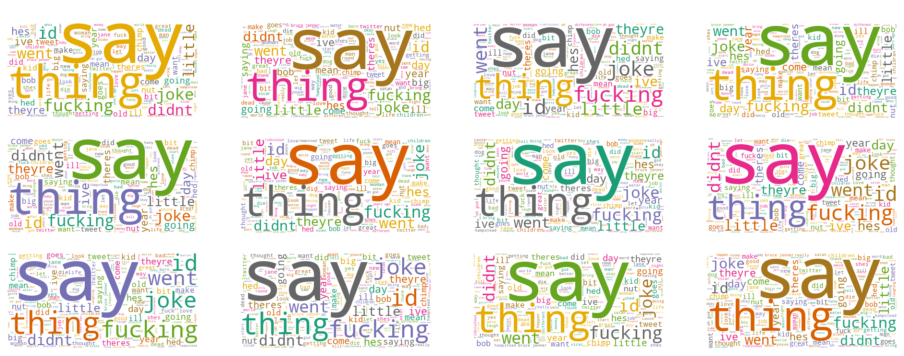

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,6]
full_names=['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
for index,comedians in enumerate(data.columns):
  wc.generate(data_clean.transcript[comedian])
  plt.subplot(3,4,index+1)
  plt.imshow(wc,interpolation="bilinear")
  plt.axis("off")
  plt.title([full_names[index]],color='white')

plt.show()


**Number of Words**

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1389
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [ ]:
# Let us calculate words per minute of each comedian
# First, find the total number of words a comedian uses
total_list=[]
for comedian in data.columns:
  totals=sum(data[comedian])
  total_list.append(totals)

# Comedy special run times from IMDB (in minutes)
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words["total_words"]=total_list
data_words["run_time"]=run_times
data_words["words_per_minute"]=data_words["total_words"]/data_words["run_time"]

# Let us sort our newly created dataframe by words_per_minute criteria
data_wpm_sort=data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_time,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1389,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


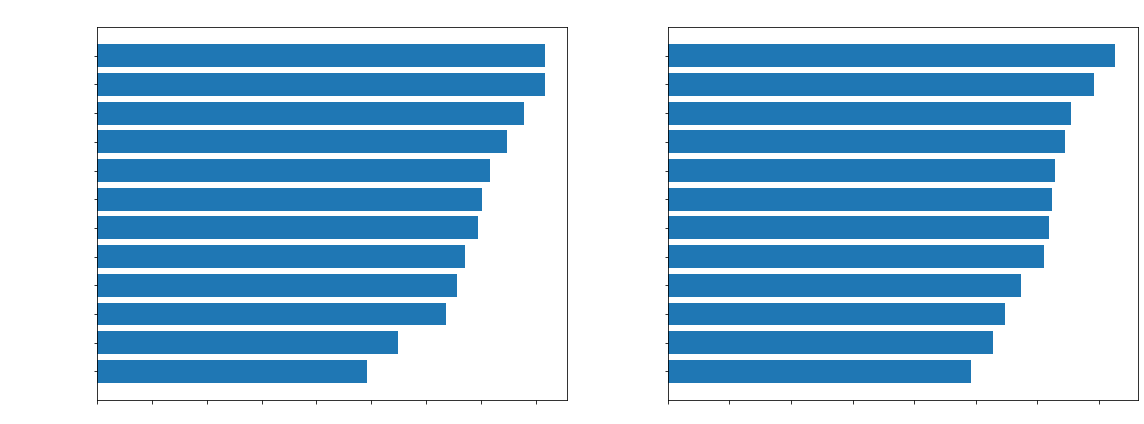

In [ ]:
# Plotting our findings

import numpy as np
y_pos=np.arange(len(data_words))
plt.subplot(1,2,1)
plt.barh(y_pos,data_unique_sort.unique_words,align='center')
plt.yticks(y_pos,data_unique_sort.comedian,color='white')
plt.title("Number of Unique Words",fontsize=20,color='white')
plt.xticks(color='white')
plt.subplot(1,2,2)
plt.barh(y_pos,data_wpm_sort.words_per_minute,align='center')
plt.yticks(y_pos,data_wpm_sort.comedian,color='white')
plt.xticks(color='white')
plt.title("Number of Words per Minute",fontsize=20,color='white')

plt.tight_layout()
plt.show()


Ricky Gervais has the highest vocabulary and Anthony Jeselnik has the least vocabulary.

Whereas Joe Rogan is the fastest in talking speed while Anthony Jeselnik being the slowest.

Again, there is nothing prevalent about Ali Wong which is of our interest here.

**PROFANITY**

In [ ]:
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [ ]:
# Let us isolate Profanity
data_bad_words=data.transpose()[['fucking','fuck','shit']]
data_profanity=pd.concat([data_bad_words.fucking + data_bad_words.fuck,data_bad_words.shit],axis=1)
data_profanity.columns=['f_word','s_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


In [ ]:
data_profanity.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

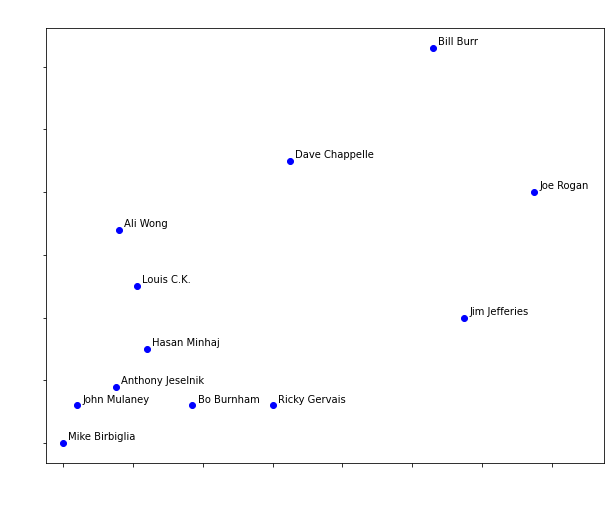

In [ ]:
#Let us create a Scatter Plot out of our findings on profanity
plt.rcParams['figure.figsize']=[10,8]
for i, comedian in enumerate(data_profanity.index):
  x=data_profanity.f_word.loc[comedian]
  y=data_profanity.s_word.loc[comedian]
  plt.scatter(x,y,color='blue')
  plt.text(x+1.5,y+0.5,full_names[i],fontsize=10) # offset the label to avoid overlapping of names and dots
  plt.xlim(-5,155)

plt.title("Number of Bad Words Used in Routine",fontsize=20,color='white')
plt.xlabel("Number of F Bombs",fontsize=15,color='white')
plt.ylabel("Number of S Words",fontsize=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

### Sentiment Analysis

In [ ]:
import pandas as pd
data=pd.read_pickle("corpus.pkl")
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [ ]:
# Here, we'll be using the textblob library to compute sentiment( in terms of polarity) and subjectivity
# Range of polarity is from -1(most negative) to +1(most positive) and that of subjectivity is from 0( i.e. highly factual) to 1(i.e. highly opiniated)
from textblob import TextBlob
pol=lambda x: TextBlob(x).sentiment.polarity
sub=lambda x: TextBlob(x).sentiment.subjectivity
data['Polarity']=data['transcript'].apply(pol)
data['Subjectivity']=data['transcript'].apply(sub)

In [ ]:

data

,transcript,full_name,Polarity,Subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


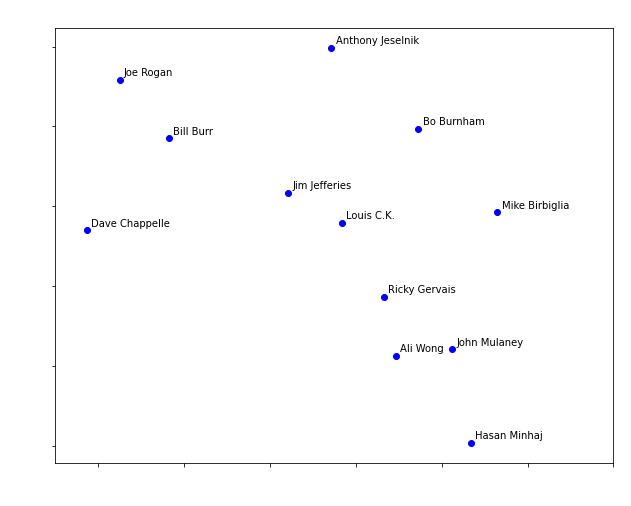

In [ ]:
# Let us visualize our findings
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,8]
for index,comedian in enumerate(data.index):
  x=data.Polarity.loc[comedian]
  y=data.Subjectivity.loc[comedian]
  plt.scatter(x,y,color='blue')
  plt.text(x+0.001,y+0.001,data['full_name'][index],fontsize=10)
  plt.xlim(-.01,.12)
plt.title('Sentiment Analysis', fontsize=20,color='white')
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15,color='white')
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15,color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()


In [ ]:
# Sentiment of routine over time
# Split each transcript into 10 parts
import numpy as np
import math

def split_text(text,n=10):
  length=len(text)
  size=math.floor(length/n)
  start=np.arange(0,length,size)
  split_list=[]
  for piece in range(n):
    split_list.append(text[start[piece]:start[piece]+size])
  return split_list


In [ ]:
# Let's take a look at our data before splitting
data

,transcript,full_name,Polarity,Subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


In [ ]:
#Let's perform the splitting using the function defined above
list_pieces=[]
for t in data.transcript:
  list_pieces.append(split_text(t))
list_pieces

In [ ]:
# Now, after we have done splitting of text, let us calculate polarity and subjectivity for all of these pieces
polarity_transcript=[]
for lp in list_pieces:
  polarity_piece=[]
  for pp in lp:
    polarity_piece.append(TextBlob(pp).sentiment.polarity)
  polarity_transcript.append(polarity_piece)
polarity_transcript

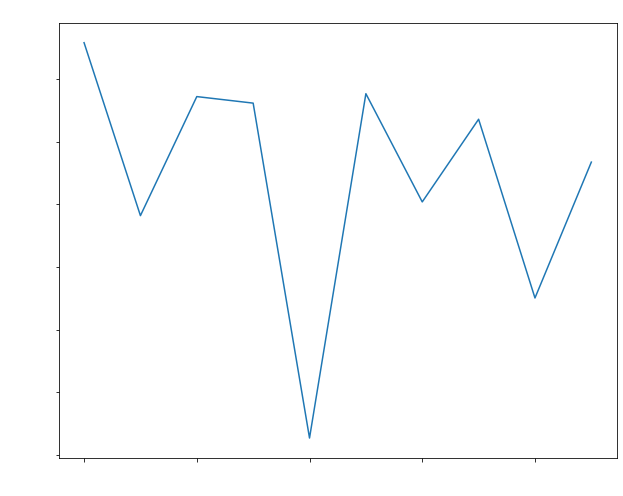

In [ ]:
# Visualizing our findings for a routine
plt.plot(polarity_transcript[0])
plt.title("Name Of Comedian : "+data["full_name"].index[0],color='white')
plt.xlabel("Split part of Routine",color='white')
plt.ylabel("Polarity/Sentiment value",color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

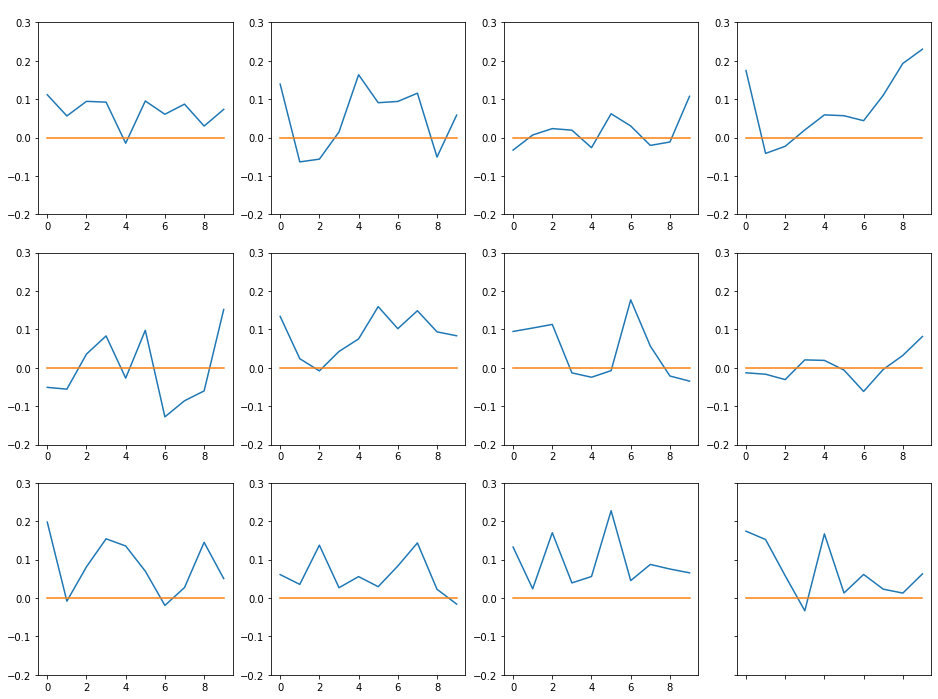

In [ ]:
# Let us now visualize and compare the results of all the comedians w.r.t. to polarity and subjectivity
plt.rcParams['figure.figsize']=[16,12]
for index,comedian in enumerate(data.index):
  plt.subplot(3,4,index+1)
  plt.plot(polarity_transcript[index])
  plt.plot(np.arange(0,10),np.zeros(10))
  plt.title(data["full_name"][index],color='white')
  plt.ylim(-0.2,0.3)
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

### Topic Modeling  ( Using LDA )

In [ ]:
# Let's start by reading our document-term matrix
import pandas as pd
import pickle

data=pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accents,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishments,according,accordingly,accoutrements,accurate,...,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youi,youll,young,younger,youngest,youth,youthis,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,...,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,1,4,2,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,0,5,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,...,0,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,0,2,5,0,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,0,3,10,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,0,3,0,1,0,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,1,0,0,0,1,0,...,1,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,0,1,2,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,1,...,0,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,0,1,8,3,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [ ]:
import logging
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import matutils,models
import scipy.sparse # sparse matrix format is used for gensim

In [ ]:
tdm=data.transpose() # term-document matrix, which is simply, a transpose of document-term matrix
tdm

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
sparse_counts=scipy.sparse.csr_matrix(tdm)
corpus=matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires a dictionary of all the terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb")) # CountVectorizor creates dtm
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [ ]:
'''
Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), 
we're ready to train the LDA model. We need to specify two other parameters - the number of topics and the number of training passes. 
Let's start the number of topics at 2, see if the results make sense, and increase the number from there.
'''

"\nNow that we have the corpus (term-document matrix) and id2word (dictionary of location: term), \nwe're ready to train the LDA model. We need to specify two other parameters - the number of topics and the number of training passes. \nLet's start the number of topics at 2, see if the results make sense, and increase the number from there.\n"

**Topic Modeling with full text**



In [ ]:
import numpy as np
# LDA num_topics=2,passes=10
lda=models.LdaModel(corpus=corpus,id2word=id2word,num_topics=2,passes=10,random_state=np.random.RandomState(seed=10))

for topic,topwords in lda.show_topics():
  print("Topic",topic,"\n",topwords,"\n")


Topic 0 
 0.005*"going" + 0.005*"say" + 0.005*"oh" + 0.005*"fucking" + 0.005*"want" + 0.005*"good" + 0.005*"really" + 0.005*"love" + 0.005*"cause" + 0.004*"went" 

Topic 1 
 0.009*"fucking" + 0.008*"shit" + 0.007*"fuck" + 0.005*"theyre" + 0.005*"didnt" + 0.005*"say" + 0.004*"hes" + 0.004*"did" + 0.004*"man" + 0.004*"oh" 



In [ ]:
# LDA num_topics=3,passes=10
lda=models.LdaModel(corpus=corpus,id2word=id2word,num_topics=3,passes=10,random_state=np.random.RandomState(seed=10))
for topic,topwords in lda.show_topics():
  print("Topic",topic,"\n",topwords,"\n")

Topic 0 
 0.006*"shit" + 0.005*"say" + 0.005*"didnt" + 0.005*"good" + 0.004*"dad" + 0.004*"hes" + 0.004*"life" + 0.004*"oh" + 0.004*"day" + 0.004*"going" 

Topic 1 
 0.011*"fucking" + 0.007*"theyre" + 0.007*"went" + 0.006*"fuck" + 0.006*"say" + 0.006*"going" + 0.006*"oh" + 0.005*"theres" + 0.005*"cause" + 0.005*"goes" 

Topic 2 
 0.010*"fucking" + 0.007*"shit" + 0.006*"want" + 0.006*"love" + 0.005*"fuck" + 0.005*"hes" + 0.005*"did" + 0.004*"stuff" + 0.004*"dude" + 0.004*"little" 



In [ ]:
# LDA num_topics=4,passes=10
lda=models.LdaModel(corpus=corpus,id2word=id2word,num_topics=4,passes=10,random_state=np.random.RandomState(seed=10))
for topic,topwords in lda.show_topics():
  print("Topic",topic,"\n",topwords,"\n")

Topic 0 
 0.006*"say" + 0.006*"going" + 0.006*"day" + 0.006*"oh" + 0.006*"went" + 0.005*"fucking" + 0.005*"want" + 0.005*"goes" + 0.005*"cause" + 0.005*"good" 

Topic 1 
 0.008*"fucking" + 0.006*"say" + 0.006*"little" + 0.005*"id" + 0.005*"love" + 0.005*"hes" + 0.005*"went" + 0.004*"want" + 0.004*"didnt" + 0.004*"ive" 

Topic 2 
 0.012*"fucking" + 0.010*"shit" + 0.009*"fuck" + 0.008*"theyre" + 0.007*"theres" + 0.006*"life" + 0.006*"hes" + 0.006*"thing" + 0.006*"cause" + 0.005*"dude" 

Topic 3 
 0.010*"shit" + 0.005*"fuck" + 0.005*"lot" + 0.005*"didnt" + 0.005*"oh" + 0.005*"man" + 0.005*"ahah" + 0.005*"fucking" + 0.004*"black" + 0.004*"hes" 



In [ ]:
# As we can clearly see, that our analysis is not working here as the algorithm is unable to identify clear topics which pertain to different words
# and there is clear overlap of words between topics.
# Therefore, we try another approach called as POS Tagging, i.e. Part of Speech Tagging and then identify different topics

**Topic modeling with nouns**

In [ ]:
# Let us create a function to pull out nouns from a string of text
from nltk import pos_tag,word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
def nouns(text):
  '''Given a string of text, tokenize the text and pull out only the nouns.'''
  is_noun=lambda pos: pos[:2]=='NN'
  tokenized=word_tokenize(text)
  all_nouns=[word for (word,pos) in pos_tag(tokenized) if is_noun(pos)]
  return ' '.join(all_nouns) # convert list of nouns returned to a string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')

In [ ]:
data_nouns=pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladies gentlemen stage ali hi thank hello na shit cause i ten minutes thank day year year people uh i im i girl thought im foremost metabolism gir...
anthony,thank thank people i em i francisco city world im stage place cities place bit today baby baby back car day dont monster i baby rock window window...
bill,thank thank pleasure georgia area oasis i june kind heat racism anybody look em drink lemonade man hell life shape man hate gym id week brutal i o...
bo,macdonald farm e i o farm pig e i i snort macdonald farm e i hes years male product giraffe sex degeneres head nipples hes years pursuit comedy re...
dave,jokes living stare work profound train thought alchemists transforms levity livelihood trance ♪ ♪ workinonit ♪ ♪ ♪ tune ♪ ♪ ♪ ♪ ahah ahah ahah ♪ ♪...
hasan,whats davis whats home i netflix la york i son davis california um year claps lord rings situation i ring powers lord rings compromise ring movie ...
jim,ladies gentlemen stage mr jim jefferies thank thats end tour tour i child ah time home i girlfriend pregnant months life decisions girl i way prob...
joe,ladies gentlemen joe fuck thanks phone fuckface i phone motherfuckers eyes goddamn phone whoo whoo strange i i im move francisco pot people edible...
john,petunia thats hello hello chicago thank crowd energy show okay thank crowds energy beginning places judge crowds way room birthday sign wait poste...
louis,music lets lights lights thank i i place place miles direction building shit town sentence i difference sidewalk street pedestrians people kind wa...


In [ ]:
#Now, create a new Document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv_nouns=CountVectorizer(stop_words=stop_words)
data_cv_nouns=cv_nouns.fit_transform(data_nouns.transcript)
data_dtm_nouns=pd.DataFrame(data_cv_nouns.toarray(),columns=cv_nouns.get_feature_names())
data_dtm_nouns.index=data_nouns.index
data_dtm_nouns

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,acc,accent,accents,acceptance,access,accident,accomplishments,accoutrements,accutane,achievement,acid,acquisitions,act,acting,actions,activity,actor,actors,ad,adam,adams,address,adjectives,adjustments,admirers,ads,adult,adults,advance,advantage,...,xmen,xray,ya,yall,yard,yards,yay,yeahmy,year,years,yecch,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolo,york,youd,youll,youth,youthis,youtube,youve,yulin,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,5,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,7,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,0,0,...,0,0,5,0,1,0,0,0,3,17,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,2,9,0,0,0,3,0,0,0,0,0,0,0,0,1,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,5,12,0,0,0,0,0,2,1,1,2,1,0,1,12,0,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3,2,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,2,11,0,0,0,4,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4,1,0,0,5,0,0,0,0,0,0,0,0,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create the Gensim Corpus but this time using only nouns
corpus_nouns=matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtm_nouns.transpose()))

# Create the vocabulary dictionary for all the terms and their respective location
id2word_nouns = dict((v, k) for k, v in cv_nouns.vocabulary_.items())

In [ ]:
# Now, we can create our LDA model starting with 2 topics and then we can increase one by one
# LDA: num_topics=2,passes=10
lda_nouns=models.LdaModel(corpus=corpus_nouns,id2word=id2word_nouns,num_topics=2,passes=10)
lda_nouns.print_topics()

[(0,
  '0.010*"shit" + 0.010*"thing" + 0.009*"man" + 0.009*"life" + 0.008*"hes" + 0.008*"fuck" + 0.007*"day" + 0.007*"way" + 0.006*"gon" + 0.006*"guy"'),
 (1,
  '0.009*"day" + 0.007*"cause" + 0.007*"thing" + 0.006*"dad" + 0.006*"way" + 0.006*"shes" + 0.005*"lot" + 0.005*"life" + 0.005*"hes" + 0.005*"night"')]

In [ ]:
# Let's try for topics=3
lda_nouns=models.LdaModel(corpus=corpus_nouns,id2word=id2word_nouns,passes=10,num_topics=3)
lda_nouns.print_topics()

[(0,
  '0.011*"cause" + 0.010*"thing" + 0.009*"day" + 0.009*"life" + 0.008*"shit" + 0.007*"fuck" + 0.007*"women" + 0.007*"lot" + 0.007*"man" + 0.007*"guy"'),
 (1,
  '0.012*"shit" + 0.008*"gon" + 0.008*"guy" + 0.008*"dude" + 0.007*"thing" + 0.007*"hes" + 0.006*"fuck" + 0.006*"man" + 0.006*"life" + 0.005*"day"'),
 (2,
  '0.008*"day" + 0.007*"man" + 0.007*"dad" + 0.007*"way" + 0.007*"thing" + 0.007*"hes" + 0.006*"joke" + 0.006*"life" + 0.006*"shit" + 0.006*"years"')]

In [ ]:
# Let's try for topics=4
lda_nouns=models.LdaModel(corpus=corpus_nouns,id2word=id2word_nouns,passes=10,num_topics=4)
lda_nouns.print_topics()

[(0,
  '0.009*"cause" + 0.008*"day" + 0.008*"thing" + 0.008*"man" + 0.008*"guy" + 0.007*"shit" + 0.007*"women" + 0.007*"fuck" + 0.006*"way" + 0.006*"lot"'),
 (1,
  '0.012*"day" + 0.008*"joke" + 0.008*"mom" + 0.008*"thing" + 0.007*"way" + 0.007*"dad" + 0.007*"clinton" + 0.006*"school" + 0.006*"baby" + 0.006*"kid"'),
 (2,
  '0.010*"dad" + 0.008*"hes" + 0.008*"shes" + 0.007*"life" + 0.007*"years" + 0.007*"day" + 0.006*"thing" + 0.006*"joke" + 0.005*"man" + 0.005*"way"'),
 (3,
  '0.013*"shit" + 0.011*"life" + 0.010*"man" + 0.009*"thing" + 0.009*"hes" + 0.009*"fuck" + 0.008*"gon" + 0.008*"cause" + 0.007*"guy" + 0.007*"day"')]

Unfortunately tuning the hyper-parameters did not yield any meaningful topics. I also tried including verbs and retraining the model with nouns, adjectives and verbs but that didn’t help it either.

### Why Topic modeling isn't working
The model assumes that every chunk of text that we feed into it contains words that are somehow related. So starting with the right corpus is crucial. However, comedy specials are inherently dynamic in nature with no fixed topics in most streams. Since the subject matter is constantly switching throughout a comedian’s routine there usually isn’t one centralized topic. 

### Summary of Insights
Although Topic Modeling was not successful, we still got something out of this experiment i.e. intelligent insights which answered my queries that came to my mind as a thought i had mentioned in the starting.

Insights:


1.   Ali had the highest s-word to f-word ratio. I personally do not mind using/listening to the s-word but i do not like hearing the f-word.
2.   Ali Wong tends to be more positive and less opinionated which is quite similar to my interests.
3.   Based on the above two insights, i can consider watching other comedians which have similar characteristics to Ali Wong.

    *   Comedians who do not say the f-word more often: Mike Birbiglia (no curse words at all) and John Mulaney.
    *   Comedians with a similar Sentiment pattern: Louis C.K. and Mike Birbiglia.

After drawing inference from the above three insights, we can conclude that i would probably love watching Mike Birbiglia's comedy as well.








